<ul>
<li>Alumno: Jorge Luis Cerdas Valverde</li>
<li>Proyecto de Razonamiento Artificial</li>
<li>Titulo: Clasificacion de audio de Gatos y Perros</li>
</ul>

<h1>Librerias:</h1>
<ul>
<li>librosa:https://librosa.org/doc/latest/index.html</li>
<li>matplotlib: https://matplotlib.org/</li>
<li>os: https://docs.python.org/3/library/os.html</li>
<li>numpy:https://numpy.org/</li>
<li>pandas:https://pandas.pydata.org/</li>
<li>Tensorflow:https://www.tensorflow.org/</li>
<li>Keras:https://keras.io/</li>
</ul>








In [1]:
#Cargamos las librerias
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline

In [2]:
#Obtenemos el directorio actual
curr_dir = os.getcwd()

In [3]:
#Cambiamos el directorio a la ubicacion donde se encuentran los archivos de audio
os.chdir(curr_dir + "\\cats_dog_audio_files")

In [4]:
#Confirmamos que el directorio apunta a la ubicacion correcta
os.getcwd()

'c:\\Users\\jocerdas\\OneDrive - Microsoft\\Documents\\AI+DS\\Universidad Creativa\\Razonamiento Artificial\\Proyecto\\cats_dog_audio_files'

In [5]:
#Obtenemos la list de archivos del directorio
list_audio_files = os.listdir()

#Aqui podemos ver las lista con cada uno de los archivos de audio
print(list_audio_files)

['cat1.wav', 'cat10.wav', 'cat2.wav', 'cat3.wav', 'cat4.wav', 'cat5.wav', 'cat6.wav', 'cat7.wav', 'cat8.wav', 'cat9.wav', 'dog1.wav', 'dog10.wav', 'dog2.wav', 'dog3.wav', 'dog4.wav', 'dog5.wav', 'dog6.wav', 'dog7.wav', 'dog8.wav', 'dog9.wav']


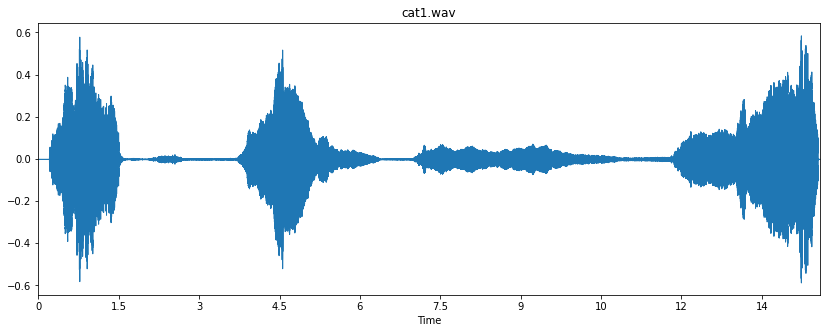

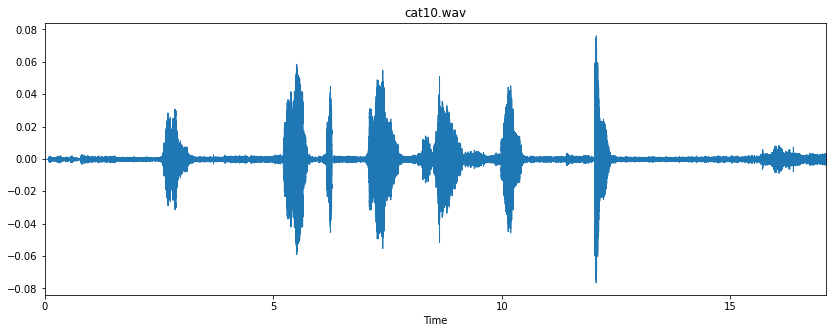

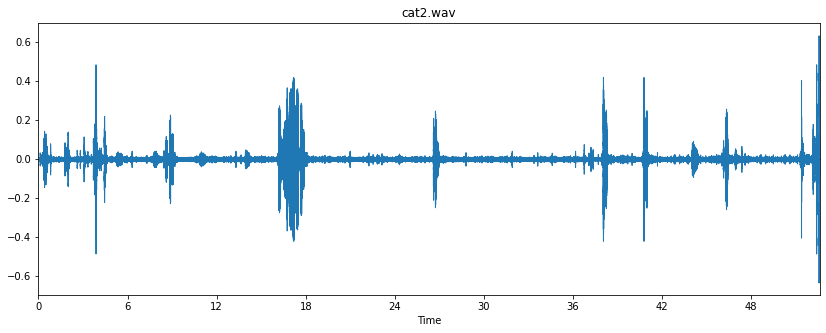

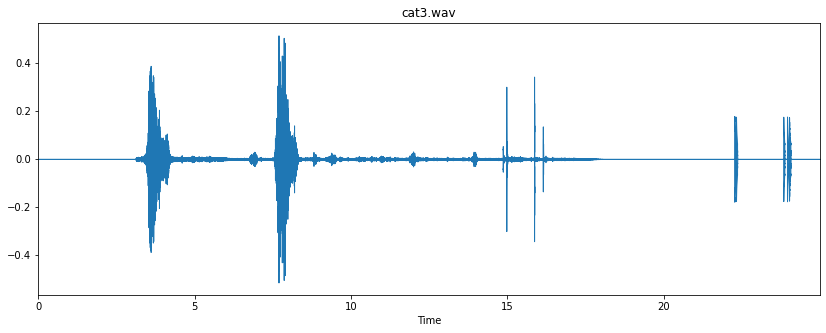

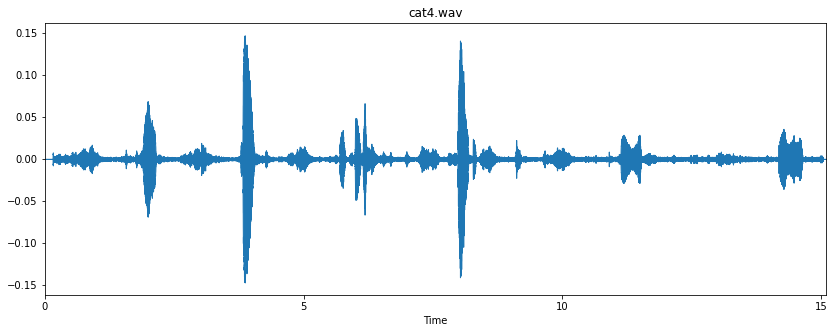

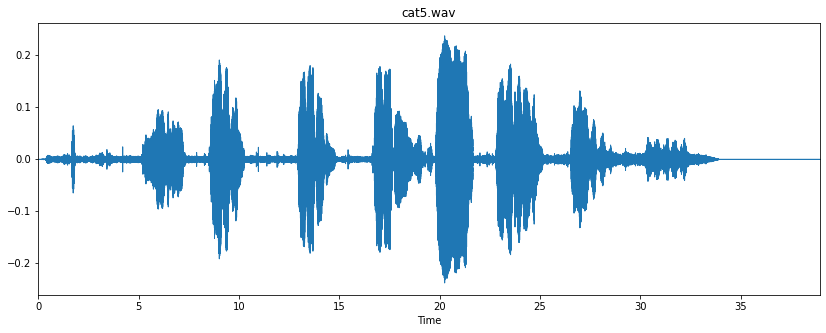

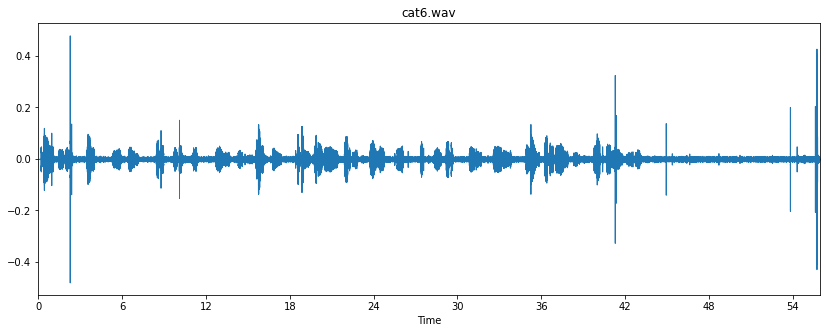

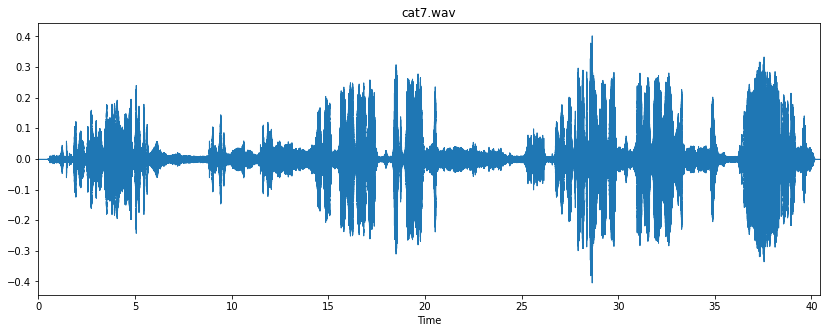

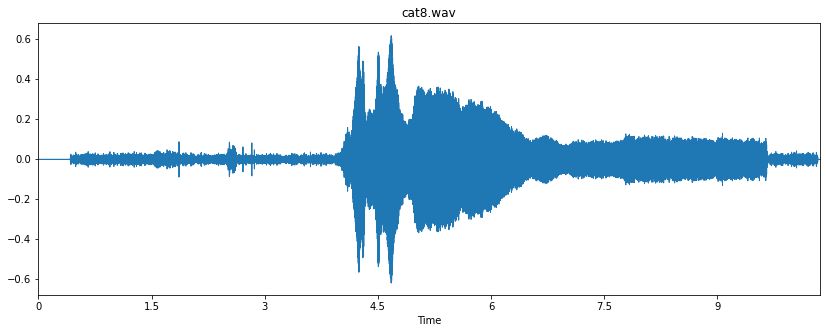

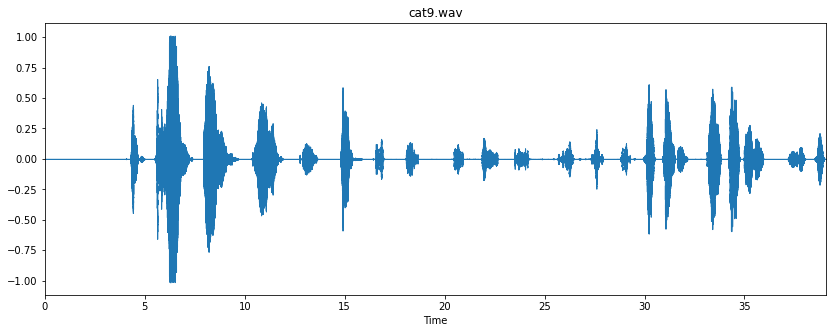

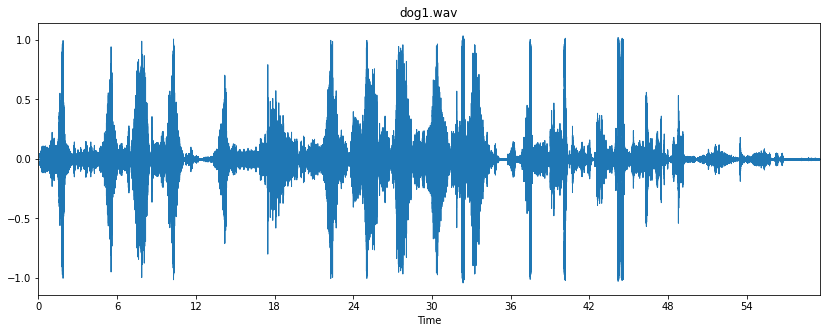

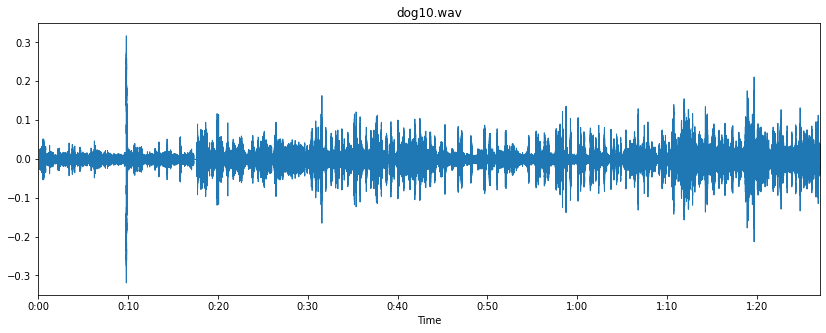

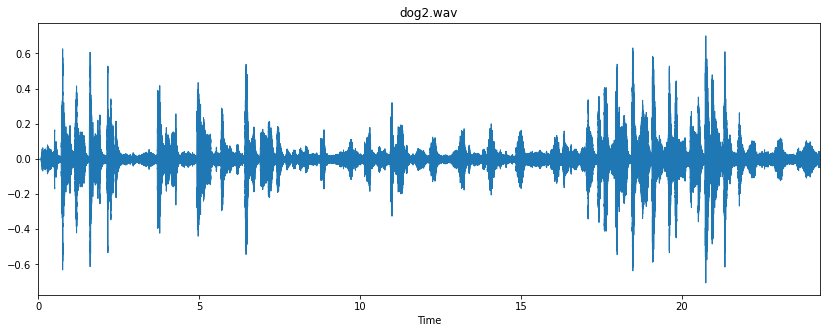

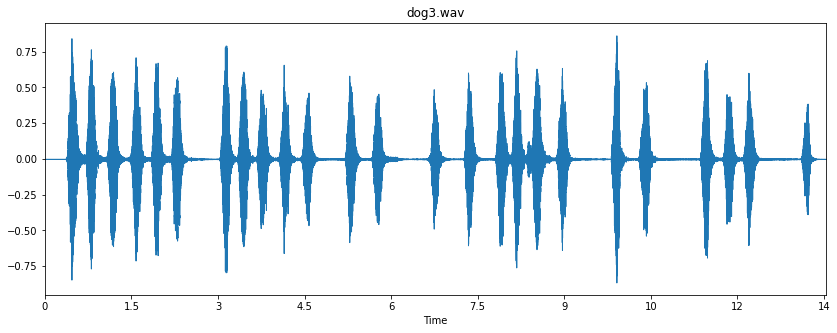

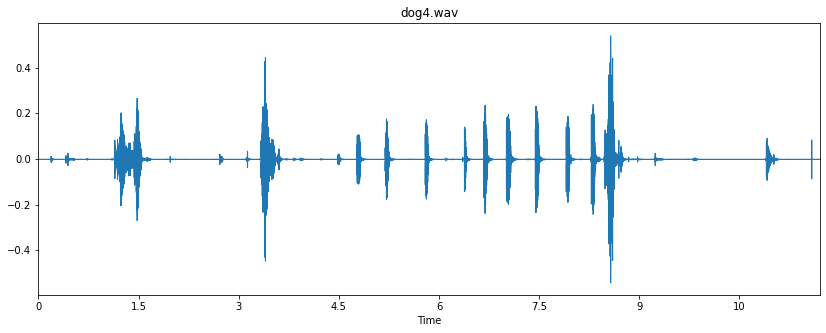

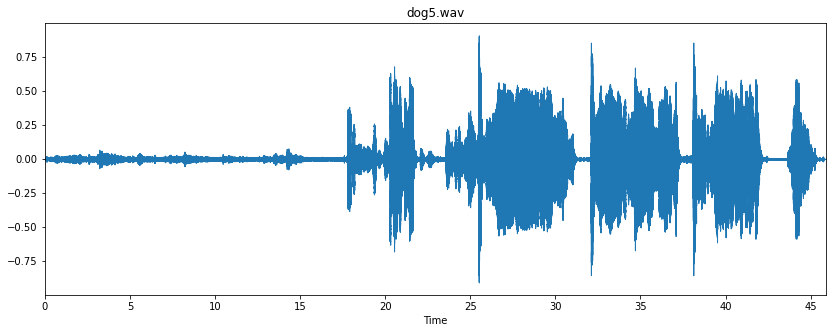

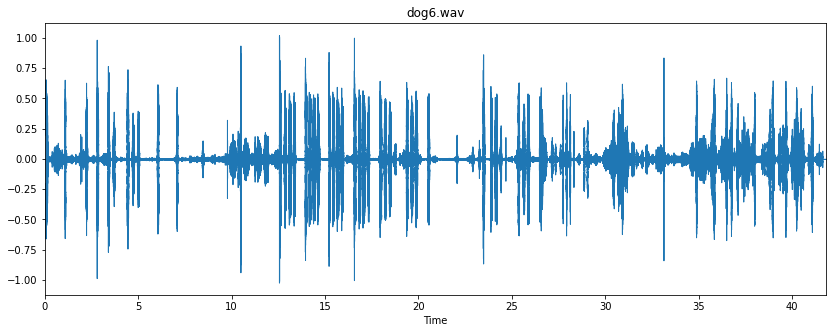

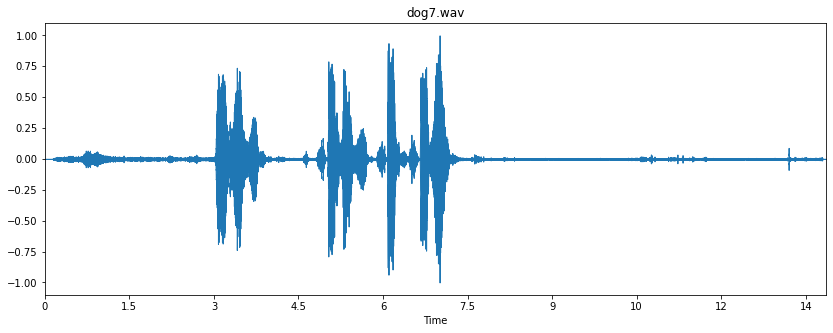

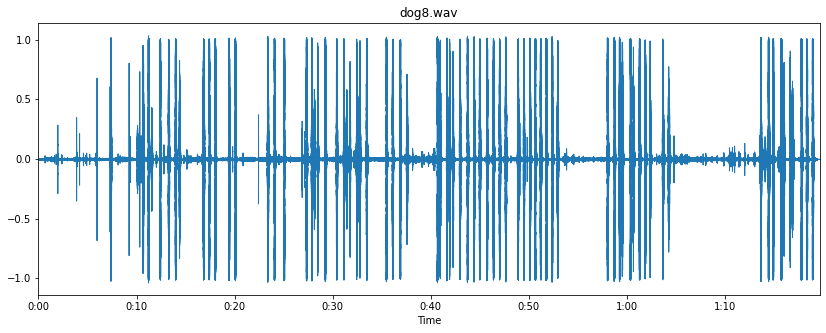

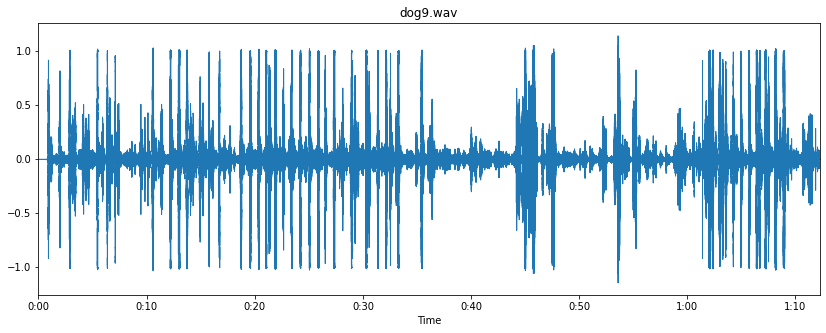

In [6]:
#Este for-loop nos ayuda a visualizar la onda del sonido de cada uno de los archivos de audio, amplitud y duracion.
for audio_file in list_audio_files:
    #Aqui usamos por primera vez librosa que es la libreria que nos ayuda a cargar los datos de audio
    data , sample = librosa.load(audio_file)
    ax = plt.subplots(figsize=(14,5))
    #El metodo waveplot() nos ayuda a visualizar la onda del sonido
    librosa.display.waveplot(data,sr=sample, ax=ax[1])
    ax[1].set(title=audio_file)
    ax[1].label_outer()

In [7]:
import pandas as pd

In [8]:
#Leemos el meta data file que contine los 'labels' por cada uno de los archivos de audio
meta_data_file_path = "C:\\Users\\jocerdas\\OneDrive - Microsoft\\Documents\\AI+DS\\Universidad Creativa\\Razonamiento Artificial\\Proyecto\\meta_data\cats_dogs_meta_data.csv"

In [9]:
#Tomamos el archivos y los transformamos en un dataframe usando pandas.
audio_classes = pd.read_csv(meta_data_file_path)
audio_classes

,audio_file,class,class_ID
0,cat1.wav,cat,1
1,cat2.wav,cat,1
2,cat3.wav,cat,1
3,cat4.wav,cat,1
4,cat5.wav,cat,1
5,cat6.wav,cat,1
6,cat7.wav,cat,1
7,cat8.wav,cat,1
8,cat9.wav,cat,1
9,ca10.wav,cat,1


In [10]:
#La funcion extraer_feature, nos va permitir extraer la representacion numerica de cada uno de los sonidos, usando librosa
def extraer_feature(audio_file): 
    print(audio_file)
    audio, sample_rate = librosa.load(audio_file)
    #librosa.feature.mfcc nos permite extraer la representacion numerica de cada archivo en base al audio y al sample_rate.
    features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    scaled_features = np.mean(features.T, axis=0)
    return scaled_features

In [11]:
#For-loop va ir por cada uno de los archivos y va llamar extraer_feature con el fin de extraer la representacion numerica y hacer append a la lista audio_data
audio_data = []
for audio_file in list_audio_files:
    data = extraer_feature(audio_file)
    audio_data.append(data)

print(audio_data)
print(type(audio_data))

cat1.wav
cat10.wav
cat2.wav
cat3.wav
cat4.wav
cat5.wav
cat6.wav
cat7.wav
cat8.wav
cat9.wav
dog1.wav
dog10.wav
dog2.wav
dog3.wav
dog4.wav
dog5.wav
dog6.wav
dog7.wav
dog8.wav
dog9.wav
[array([-3.9149344e+02,  5.5775673e+01, -3.8853725e+01,  2.4462311e+01,
        4.9855785e+00,  6.7722902e+00, -7.7932343e+00,  7.2498837e+00,
        8.5134239e+00, -1.1499164e+01,  5.8785276e+00, -4.6778011e+00,
       -7.0668907e+00,  7.3287553e-01, -2.8206215e+00,  1.1492660e+01,
       -5.0703568e+00,  8.9550801e-02, -1.1448344e+01, -7.9413640e-01,
       -8.8062632e-01, -2.0681612e+00, -6.7861290e+00, -8.3434362e+00,
       -2.4895744e+00, -2.6815608e+00, -5.4676967e+00, -5.6051035e+00,
       -1.5648909e-01, -2.0337817e-01, -9.0469561e+00, -6.7792668e+00,
       -3.7235749e+00, -2.3002231e+00, -5.1699862e+00, -2.6518123e+00,
       -2.2481580e+00, -2.9824171e+00,  2.0294275e+00,  5.5826001e+00],
      dtype=float32), array([-5.4974060e+02,  7.5765022e+01,  2.4430128e+01,  2.8568235e+01,
        6.856

In [12]:
#For-loop para extraer las classes del archivo de meta data
a_class = []

for index_num, row in audio_classes.iterrows():
    c = row["class"]
    a_class.append(c)

print(a_class)


['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog']


In [13]:
#Preparamos la informacion para generar el data frame nuevo
df_data = {"Feature": audio_data, "Class":a_class}

In [14]:
#Creamos el dataframe nuevo con la representacion numerica de los archivos de audio y la clase correspondiente
audio_features_df = pd.DataFrame(df_data)
audio_features_df

,Feature,Class
0,"[-391.49344, 55.775673, -38.853725, 24.46231, ...",cat
1,"[-549.7406, 75.76502, 24.430128, 28.568235, 6....",cat
2,"[-428.52734, 131.6967, 25.878391, 24.948586, 7...",cat
3,"[-506.13306, 29.489174, -13.578928, 15.343079,...",cat
4,"[-485.5326, 46.212704, -17.890223, 43.47674, -...",cat
5,"[-419.99945, 89.61479, -6.394439, -1.3837123, ...",cat
6,"[-355.0625, 80.55896, -5.8047223, 9.411734, -9...",cat
7,"[-330.17993, 64.56144, -56.01101, 11.140806, -...",cat
8,"[-310.5326, 119.04189, -17.225433, 23.382616, ...",cat
9,"[-472.63397, 28.766754, -25.381268, -10.243964...",cat


In [15]:
#Importamos LabelEncoder y codificamos la columna clase (0 = gato & 1 = perro)
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder = LabelEncoder()

In [17]:
audio_features_df["Class"] = encoder.fit_transform(audio_features_df["Class"]).astype("str")

In [18]:
audio_features_df.head(15)

,Feature,Class
0,"[-391.49344, 55.775673, -38.853725, 24.46231, ...",0
1,"[-549.7406, 75.76502, 24.430128, 28.568235, 6....",0
2,"[-428.52734, 131.6967, 25.878391, 24.948586, 7...",0
3,"[-506.13306, 29.489174, -13.578928, 15.343079,...",0
4,"[-485.5326, 46.212704, -17.890223, 43.47674, -...",0
5,"[-419.99945, 89.61479, -6.394439, -1.3837123, ...",0
6,"[-355.0625, 80.55896, -5.8047223, 9.411734, -9...",0
7,"[-330.17993, 64.56144, -56.01101, 11.140806, -...",0
8,"[-310.5326, 119.04189, -17.225433, 23.382616, ...",0
9,"[-472.63397, 28.766754, -25.381268, -10.243964...",0


In [19]:
#Dividimos nuestras variables dependientes e independientes
x = np.array(audio_features_df["Feature"].tolist())
x.shape

(20, 40)

In [20]:
y = np.array(audio_features_df["Class"].tolist())

In [21]:
y=np.array(pd.get_dummies(y))
y.shape

(20, 2)

In [22]:
#Creamos nuestras variables de prueba y entrenamiento
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [24]:
x_train.shape

(16, 40)

In [25]:
x_test.shape

(4, 40)

In [26]:
#verfificamos una muestra de nuestros datos de entrenamiento
x_test[1]

array([-2.9053647e+02,  8.5799644e+01, -2.4288504e+01,  1.2970954e+01,
        3.6541257e+00,  5.0390613e-01,  7.1629424e+00,  4.6293559e+00,
        3.2723444e+00,  4.1389036e+00, -1.9678394e+00,  3.9247939e-01,
       -3.7108295e+00,  2.6444507e+00, -2.0925136e+00, -3.4577182e-01,
       -2.5816827e+00,  4.7224614e-01, -3.1866186e+00,  6.5355510e-01,
       -2.9951067e+00, -6.8215507e-01, -2.5451381e+00,  1.8351261e-01,
       -3.3669198e+00,  1.2061734e+00, -2.9390132e+00,  3.0919144e-01,
       -2.4865150e+00,  7.7480398e-02, -2.7341049e+00,  1.6936900e-01,
       -3.1769598e+00, -7.5553462e-02, -2.4313660e+00,  8.6735016e-01,
       -1.1936895e+00,  4.8818195e-01, -1.2962192e+00,  6.8832242e-01],
      dtype=float32)

In [27]:
y_test[1]

array([0, 1], dtype=uint8)

In [28]:
y_train.shape

(16, 2)

In [29]:
y_test.shape

(4, 2)

In [30]:
#Importamos las librerias necesarias para construir nuestro modelo
import tensorflow as tf
print(tf.__version__)

2.6.0


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [32]:
#Construimos el modelo
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))

###second layer
model.add(Dense(20))
model.add(Activation('relu'))

###third layer
model.add(Dense(10))
model.add(Activation('relu'))


###final layer
model.add(Dense(2))
model.add(Activation('softmax'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                2020      
_________________________________________________________________
activation_1 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2

In [34]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy',"categorical_accuracy"],optimizer='adam')

In [35]:
#Entrenamos el modelo
history = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 368ms/step - loss: 4.5693 - accuracy: 0.5000 - categorical_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 2.4321 - accuracy: 0.5000 - categorical_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 1.1700 - accuracy: 0.5625 - categorical_accuracy: 0.5625
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6062 - accuracy: 0.6250 - categorical_accuracy: 0.6250
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.8870 - accuracy: 0.6250 - categorical_accuracy: 0.6250
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.9379 - accuracy: 0.5000 - categorical_accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.9287 - accuracy: 0.5000 - categorical_accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.8842 - accuracy: 0.5000 - cat

In [36]:
#Evaluamos el modelo con nuestros datos de prueba
test_accuracy = model.evaluate(x_test, y_test)
print(test_accuracy[1])

1/1 [==============================] - 0s 140ms/step - loss: 0.6973 - accuracy: 0.7500 - categorical_accuracy: 0.7500
0.75


In [37]:
#Obtenemos informacion de accuracy & loss para poder graficar y observar el comportamiento del modelo durante el proceso de entrenamiento
acc = history.history["accuracy"]
loss = history.history["loss"]

print("Accuracy")
print(acc)

print("Loss")
print(loss)

e = range(1, len(acc) +1)


Accuracy
[0.5, 0.5, 0.5625, 0.625, 0.625, 0.5, 0.5, 0.5, 0.5, 0.625, 0.625, 0.75, 0.75, 0.75, 0.75, 0.6875, 0.6875, 0.75, 0.75, 0.8125, 0.75, 0.75, 0.75, 0.75, 0.8125, 0.75, 0.8125, 0.8125, 0.8125, 0.75, 0.75, 0.75, 0.75, 0.8125, 0.875, 0.875, 0.8125, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375]
Loss
[4.569280624389648, 2.432072162628174, 1.1699838638305664, 0.6061822175979614, 0.8869823217391968, 0.9378980398178101, 0.9287170171737671, 0.8841668367385864, 0.8265001177787781, 0.7414311170578003, 0.6668275594711304, 0.6132436990737915, 0.6029105186462402, 0.616625666618

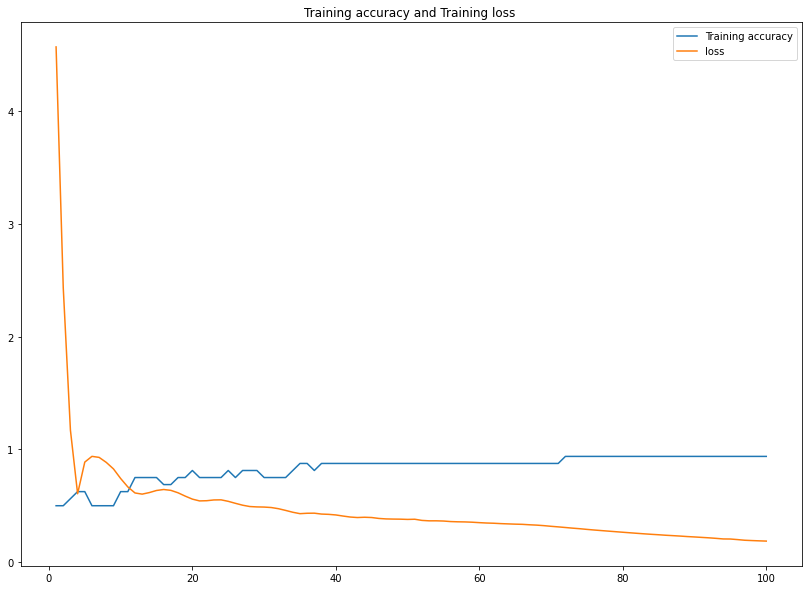

In [38]:
plt.figure(figsize=(14,10))
plt.plot(e, acc, label="Training accuracy")
plt.plot(e, loss, label="loss")
plt.title("Training accuracy and Training loss ")
plt.legend()
plt.show()

In [39]:
#Tomamos un archivo de la lista para hacer una prediccion
pred_audio_file = list_audio_files[19]
pred_audio_file

'dog9.wav'

In [40]:
pred_audio_file = extraer_feature(pred_audio_file)


dog9.wav


In [41]:
pred_feature = pred_audio_file.reshape(1,-1)

In [42]:
#Tenemos dos salidas en el model, este predice que es un perro
model.predict(pred_feature)

array([[0.10680235, 0.89319766]], dtype=float32)

In [43]:
np.argmax(pred_feature)

1